In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import credentials
import pandas as pd
import re
#for text pre-processing
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
import time

In [2]:
driver = webdriver.Firefox()
driver.get("http://www.linkedin.com")

In [3]:
username = driver.find_element_by_id("session_key")
password = driver.find_element_by_id("session_password")
signin = driver.find_element_by_class_name("sign-in-form__submit-button")
#//button[contains(text(),'sign in')]

In [4]:
username.clear()
username.send_keys(credentials.username)
password.clear()
password.send_keys(credentials.password)
signin.click()

In [5]:
driver.get("https://www.linkedin.com/jobs/")

In [6]:
job_search = driver.find_element_by_xpath("//*[@class='jobs-search-box__text-input jobs-search-box__keyboard-text-input']")
city_search = driver.find_element_by_xpath("//*[@class='jobs-search-box__text-input']")
#job_search = driver.find_element_by_xpath("//*[@id=\"jobs-search-box-keyword-id-ember*\"]")
#//*[@id="jobs-search-box-location-id-ember42"]
#driver.find_elements_by_xpath("//*[contains(text(), 'My Button')]")
#driver.find_element_by_xpath("//*[@id='jobs-search-box-keyword-id-ember1008']")

In [7]:
job='Data Science'
country="United Kingdom"

In [8]:
job_search.clear()
city_search.clear()
job_search.send_keys(job)
city_search.send_keys(country)
driver.find_element_by_class_name("jobs-search-box__submit-button").click()

In [9]:
x=driver.current_url

In [10]:
x

'https://www.linkedin.com/jobs/search/?geoId=101165590&keywords=Data%20Science&location=United%20Kingdom'

In [11]:
def get_job_ids():
    html_list = driver.find_element_by_class_name("jobs-search-results__list")
    items = html_list.find_elements_by_tag_name("li")
    jobs_id=[]
    for item in items:
        jobs_id.append(item.get_attribute("id"))
    jobs_id = [x for x in jobs_id if x]
    return jobs_id

In [12]:
def get_job_description(str_list):
    Job_description=[]
    for i in range(0,len(str_list)):
        time.sleep(1)
        driver.find_element_by_id(str_list[i]).click()
        html_list = driver.find_element_by_id("job-details")
        content=[]
        items = html_list.find_elements_by_tag_name("span")
        if len(items)!=0:
            for item in items:
                content.append(item.text)
        content = [x for x in content if x] 
        seperator = ' '
        joined = seperator.join(content).lower()
        joined = joined.strip()
        joined = joined.replace("\n", "")
        joined = joined.replace("'","\'")
        #joined = re.verbose(joined)
        Job_description.append(joined)
    Job_description=pd.Series(Job_description)
    return Job_description

In [13]:
data = pd.read_csv('Tools and skils.csv')

In [14]:
data['Tools and Skills'] = data['Tools and Skills'].str.replace('�', '')
data['Tools and Skills'] = data['Tools and Skills'].str.lower()

In [15]:
skill_list=list(data['Tools and Skills'])

In [16]:
def count_of_skills(skill_list,jd):
    dataframe=[]
    for i in range(0,len(skill_list)):
        str1=jd.str.count(skill_list[i])
        dataframe.append(str1)
    dataframe=pd.DataFrame(dataframe)
    dataframe=dataframe.transpose()
    dataframe.columns=skill_list
    dataframe.where(dataframe==0,1,inplace=True)
    return dataframe

In [17]:
def get_page_ids():
    page_list = driver.find_elements_by_class_name("pv5")
    items = page_list[0].find_elements_by_tag_name("li")
    selected = page_list[0].find_elements_by_class_name("selected")[0].get_attribute("id")
    pages_id=[]
    for item in items:
        pages_id.append(item.get_attribute("id"))
    pages_id = [x for x in pages_id if x]
    return pages_id,selected

In [18]:
def max_page_number():
    page_list = driver.find_elements_by_class_name("pv5")
    items = page_list[0].find_elements_by_tag_name("button")
    pages_id=[]
    for item in items:
        pages_id.append(item.get_attribute("aria-label"))
    pages_id = [x for x in pages_id if x]
    return int(pages_id[-1].replace('Page ',''))

In [19]:
maxi_page=max_page_number()

In [20]:
final_dataframe=pd.DataFrame(columns=skill_list)
for i in range(0,maxi_page):
    str_list=get_job_ids()
    JD=get_job_description(str_list)
    dataframe=count_of_skills(skill_list,JD)
    final_dataframe=final_dataframe.append(dataframe, ignore_index=True)
    print(final_dataframe.shape)
    page_id_list,selected_page=get_page_ids()
    position_in_list=page_id_list.index(selected_page)
    time.sleep(3)
    x=driver.current_url
    if i%2!=0:
        driver.find_element_by_id(page_id_list[position_in_list+1]).click()
    else:
        time.sleep(5)
        driver.find_element_by_id(page_id_list[position_in_list+1]).click()

(25, 61)
(50, 61)
(75, 61)
(100, 61)
(125, 61)
(150, 61)
(175, 61)
(200, 61)
(225, 61)
(250, 61)
(275, 61)
(300, 61)
(325, 61)
(350, 61)
(375, 61)
(400, 61)
(425, 61)
(450, 61)
(475, 61)
(500, 61)
(525, 61)
(550, 61)
(575, 61)
(600, 61)
(625, 61)
(650, 61)
(675, 61)
(700, 61)
(725, 61)
(750, 61)
(775, 61)
(800, 61)
(825, 61)
(850, 61)
(875, 61)
(900, 61)
(925, 61)
(950, 61)
(975, 61)
(1000, 61)


IndexError: list index out of range

In [21]:
final_dataframe['sum']=final_dataframe.sum(axis=1)

In [22]:
final_dataframe[final_dataframe['sum']==0]

,alteryx,apache flink,apache kafka,apache spark,bash,big data,bigml,curiosity,d3.js,datarobot,...,microsoft azure,google cloud,nlp,marketing intelligence,power bi,vba,snowflake,cassandra,java script,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [23]:
final_dataframe=final_dataframe.sort_values(by='sum',ascending=False)

In [24]:
final_data1=final_dataframe.transpose()

In [25]:
final_data1.drop(['sum'],inplace=True)

In [26]:
final_data1['sum']=final_data1.sum(axis=1)

In [27]:
final_data1['count']=final_data1.count(axis=1)

In [28]:
final_data1=final_data1.sort_values(by='sum',ascending=False)

In [29]:
final_data1['sum'].head(5)

python        615.0
sql           553.0
excel         485.0
statistics    250.0
aws           232.0
Name: sum, dtype: float64

In [30]:
total=len(final_data1.columns)
total

1002

In [31]:
final_data1['percent_']=final_data1['sum']/total

In [32]:
final_data1['percent_'].head()

python        0.613772
sql           0.551896
excel         0.484032
statistics    0.249501
aws           0.231537
Name: percent_, dtype: float64

In [38]:
final_data1.head()

,967,701,989,722,239,131,27,113,897,331,...,751,408,412,739,418,422,0,sum,count,percent_
python,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,615.0,1001,0.613772
sql,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,553.0,1001,0.551896
excel,1,1,0,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,485.0,1001,0.484032
statistics,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,250.0,1001,0.249501
aws,1,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,232.0,1001,0.231537


In [64]:
final_data1.to_csv('D:/linkedin_scrapped_data.csv')

In [93]:
import pandas as pd
import numpy as np

In [94]:
linkedin_scrapped_data=pd.read_csv('D:/linkedin_scrapped_data.csv')

In [95]:
Top_10_skills=linkedin_scrapped_data.head(10)

In [96]:
Top_10_skills.head()

,Unnamed: 0,967,701,989,722,239,131,27,113,897,...,751,408,412,739,418,422,0,sum,count,percent_
0,python,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,615.0,1001,0.613772
1,sql,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,553.0,1001,0.551896
2,excel,1,1,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,485.0,1001,0.484032
3,statistics,0,1,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,250.0,1001,0.249501
4,aws,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,232.0,1001,0.231537


In [97]:
columns=list(Top_10_skills.columns)

In [98]:
columns[0]='Skills'

In [99]:
Top_10_skills.columns=columns

In [100]:
Top_10_skills['percent %']=Top_10_skills['percent_'].round(2)*100

<ipython-input-100-4340c6896412>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_10_skills['percent %']=Top_10_skills['percent_'].round(2)*100


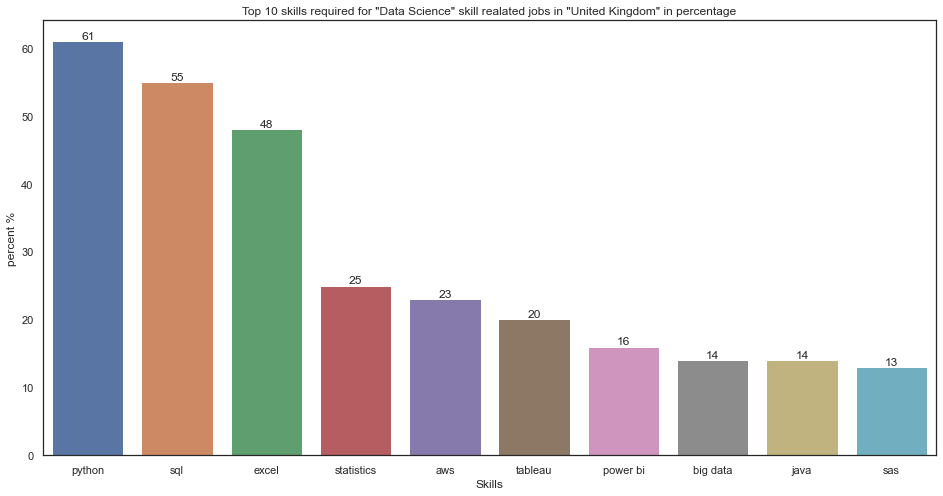

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
plt.figure(figsize=(16,8))
plt.title('Top 10 skills required for "Data Science" skill realated jobs in "United Kingdom" in percentage')
ax = sns.barplot(x='Skills',y="percent %", data=Top_10_skills)
ax.bar_label(ax.containers[0])
plt.show()